BUAD 5092 Module 5

Jason Street

# Part 1
## Model Formulation

Formulate the integer programming optimization model that minimizes total distance traveled to meet the shipping demand while using three manufacturing sites.

**Sets** \
$N$: set of cities \{Boston, Chicago, Dallas, Denver, Los Angeles, Richmond, Miami, New York, Phoenix, Pittsburgh, San Francisco, Seattle\} \
$A$: set of city pair arcs

**Parameters** \
$r_k$: number of trips required for each city $k$ \
$d_{i,j}$: distance between each potential facility location $i$ and each city $j$

**Decision Variables** \
$x_{i,j}$: binary, $=1$ if facility $i$ serves city $j$, $=0$ otherwise \
$y_i$: binary, $=1$ if facility $i$ is selected, $=0$ otherwise

**Objective Function and Constraints** \
The optimization model is formulated as

\begin{equation*}
\begin{matrix}
\underset{x}{\min} & \underset{(i,j) \in A}{\sum} r_j d_{i,j} x_{i,j} &\\
\textrm{s.t.} & \underset{i:(i,j) \in A}{\sum}x_{i,j} & = & 1 & \forall j \in N \\
& \underset{j:(i,j) \in A}{\sum} r_j x_{i,j} & \leq & \max(r_k) y_i & \forall i \in N \\
& \underset{i \in N}{\sum} y_i & = & 3 & \\
& x_{i,j} & \in & {0,1} & \forall (i,j) \in A \\
& y_i & \in & {0,1} & \forall i \in N \\
\end{matrix}
\end{equation*}

where $\max(r_k)$ is greater than the largest number of required trips by a city.

# Part 2
## Excel Prototype

Prototype your model using Excel solver. Solve the simple service center selection problem in your textbook, Practical Management Science, Example 6.5 in Chapter 6. Make sure you get the same answer before proceeding. Your PDF report should include a screenshot of your Excel model, along with the Solver window. Do not just take a screenshot of the figure in the book.

## Screenshot

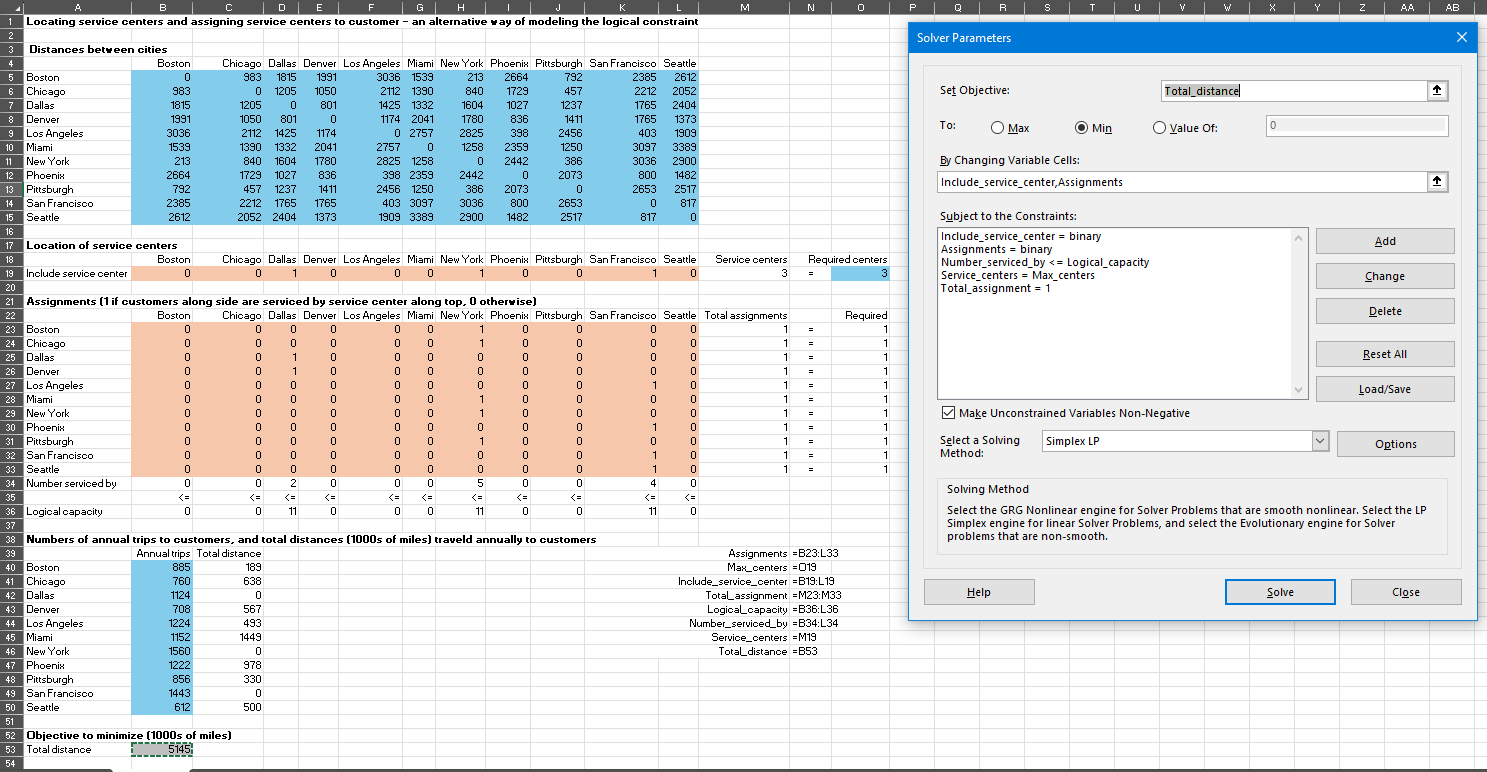

In [1]:
from IPython import display
display.Image("./M5_q2_screenshot.png")

# Part 3
## Python Prototype

Build the same service center selection problem (Example 6.5 in Chapter 6) in Python and solve using Gurobi. Read in your mileage and demand data from the provided Excel file as Pandas DataFrame objects using the Pandas read_excel() function. For this part you will want to use the worksheet tabs in the Excel file with the “ex65” prefix. Ensure that your code prints out the total distance traveled, the location of the service centers, and which service center fulfills each demand location. Make sure you get the same answer that you got for question 2 above. This model validation step is key to solving this project efficiently (it will save much troubleshooting if you run into errors later), and it is even more critical when model building in your career.

## Model

In [2]:
import pandas as pd
from gurobipy import *
m = Model('Mod5Part3')

# read in data
file_name = 'buad5092-m5-integer-programming-assignment-data.xlsx'
data = pd.read_excel(file_name, sheet_name='ex65-miles')
demands = pd.read_excel(file_name, sheet_name='ex65-demand')

# Extract sets and parameters
## Set-cities, skipping first column
cities = list(data.columns[1:])
## Distance matrix
distances = data.set_index(data.columns[0]).T.to_dict('list')
## No. of trips required each city
r = demands.iloc[0].to_dict()

# Decision Variables
## flow
x = m.addVars(cities, cities, vtype=GRB.BINARY, name="x")
## selection
y = m.addVars(cities, vtype=GRB.BINARY, name="y")

# Objective Function
## MIN total distance traveled
m.setObjective(quicksum(r[j] * distances[i][cities.index(j)] * x[i,j] for i in cities for j in cities), GRB.MINIMIZE)
m.update()

# Constraints
## each city is assigned to exactly one facility
m.addConstrs((quicksum(x[i,j] for i in cities) == 1 for j in cities), name="Demand")
## facility capacity 
m.addConstrs((quicksum(r[j] * x[i,j] for j in cities) <= quicksum(r.values()) * y[i] for i in cities), name="FacilityCapacity")
## facilities limited to 3
m.addConstr(quicksum(y[i] for i in cities) == 3, name="FacilityLimit")
m.update()

# Solve and output the model
m.optimize()
print("\n\n")
for i in cities:
    if y[i].X > 0.5:
        print(f"Facility at: {i}")
        for j in cities:
            if x[i,j].X > 0.5:
                print(f"  serves: {j}")

print(f"\nTotal distance: {m.objVal}")

Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-07
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 23 rows, 132 columns and 264 nonzeros
Model fingerprint: 0xa94096a4
Variable types: 0 continuous, 132 integer (132 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [2e+05, 5e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Found heuristic solution: objective 1.639527e+07
Presolve time: 0.00s
Presolved: 23 rows, 132 columns, 264 nonzeros
Variable types: 0 continuous, 132 integer (132 binary)
Found heuristic solution: objective 8541783.0000

Root relaxation: objective 0.000000e+00, 22 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective B

# Part 4
## Python Model (Distance)

Modify your Python code to read in the provided Shark Tank data set of demands, distances (miles), and travel times (hours). These are the worksheet tabs with the “st” prefix. If you did the previous question correctly, then this part will only be a slight modification. Solve the Shark Tank manufacturing site selection problem to minimize total distance traveled. Ensure that your code prints out the total distance traveled, the location of the manufacturing sites, and which manufacturing site fulfills each demand location.

## Model

In [3]:
import pandas as pd
from gurobipy import *
m = Model('SharkTankModel')

# read in data
file_name = 'buad5092-m5-integer-programming-assignment-data.xlsx'
miles_data = pd.read_excel(file_name, sheet_name='st-miles')
hours_data = pd.read_excel(file_name, sheet_name='st-hours')
demands_data = pd.read_excel(file_name, sheet_name='st-demand')

# Extract sets and parameters
# Set-cities, skipping first column
cities = list(miles_data.columns[1:])
# Distance matrix
distances = miles_data.set_index(miles_data.columns[0]).T.to_dict('list')
# No. of trips required each city
demands = demands_data.iloc[0].to_dict()

# Decision Variables
# flow
x = m.addVars(cities, cities, vtype=GRB.BINARY, name="x")
# selection
y = m.addVars(cities, vtype=GRB.BINARY, name="y")

# Objective Function
# MIN total distance traveled
m.setObjective(quicksum(demands[j] * distances[i][cities.index(j)] * x[i,j] for i in cities for j in cities), GRB.MINIMIZE)
m.update()

# Constraints
# each city is assigned to exactly one facility
m.addConstrs((quicksum(x[i,j] for i in cities) == 1 for j in cities), name="Demand")
# facility capacity
m.addConstrs((quicksum(demands[j] * x[i,j] for j in cities) <= quicksum(demands.values()) * y[i] for i in cities), name="FacilityCapacity")
# facilities limited to 3
m.addConstr(quicksum(y[i] for i in cities) == 3, name="FacilityLimit")
m.update()

# Solve and output the model
m.optimize()
print("\n\n")
for i in cities:
    if y[i].X > 0.5:
        print(f"Facility at: {i}")
        for j in cities:
            if x[i,j].X > 0.5:
                print(f"  serves: {j}")

print(f"\nTotal distance: {m.objVal}")

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 25 rows, 156 columns and 312 nonzeros
Model fingerprint: 0x94c09b3f
Variable types: 0 continuous, 156 integer (156 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+04]
  Objective range  [2e+05, 1e+07]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Found heuristic solution: objective 3.252439e+07
Presolve time: 0.00s
Presolved: 25 rows, 156 columns, 312 nonzeros
Variable types: 0 continuous, 156 integer (156 binary)
Found heuristic solution: objective 1.635335e+07

Root relaxation: objective 0.000000e+00, 24 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/No

# Part 5
## Python Model (Time)

Modify your Python code to solve the Shark Tank manufacturing site selection problem to minimize total travel time. Ensure that your code prints out the total travel time, the location of the manufacturing sites, and which manufacturing site fulfills each demand location.

## Model

In [4]:
import pandas as pd
from gurobipy import *
m = Model('SharkTankModel')

# read in data
file_name = 'buad5092-m5-integer-programming-assignment-data.xlsx'
miles_data = pd.read_excel(file_name, sheet_name='st-miles')
hours_data = pd.read_excel(file_name, sheet_name='st-hours')
demands_data = pd.read_excel(file_name, sheet_name='st-demand')

# Extract sets and parameters
# Set-cities, skipping first column
cities = list(hours_data.columns[1:])
# Time matrix
times = hours_data.set_index(hours_data.columns[0]).T.to_dict('list')
# No. of trips required each city
demands = demands_data.iloc[0].to_dict()

# Decision Variables
# flow
x = m.addVars(cities, cities, vtype=GRB.BINARY, name="x")
# selection
y = m.addVars(cities, vtype=GRB.BINARY, name="y")

# Objective Function
# MIN total travel time
m.setObjective(quicksum(demands[j] * times[i][cities.index(j)] * x[i,j] for i in cities for j in cities), GRB.MINIMIZE)
m.update()

# Constraints
# each city is assigned to exactly one facility
m.addConstrs((quicksum(x[i,j] for i in cities) == 1 for j in cities), name="Demand")
# facility capacity
m.addConstrs((quicksum(demands[j] * x[i,j] for j in cities) <= quicksum(demands.values()) * y[i] for i in cities), name="FacilityCapacity")
# facilities limited to 3
m.addConstr(quicksum(y[i] for i in cities) == 3, name="FacilityLimit")
m.update()

# Solve and output the model
m.optimize()
print("\n\n")
for i in cities:
    if y[i].X > 0.5:
        print(f"Facility at: {i}")
        for j in cities:
            if x[i,j].X > 0.5:
                print(f"  serves: {j}")

print(f"\nTotal travel time: {m.objVal}")

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 25 rows, 156 columns and 312 nonzeros
Model fingerprint: 0x228daf95
Variable types: 0 continuous, 156 integer (156 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+04]
  Objective range  [3e+03, 1e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Found heuristic solution: objective 371033.35195
Presolve time: 0.00s
Presolved: 25 rows, 156 columns, 312 nonzeros
Variable types: 0 continuous, 156 integer (156 binary)
Found heuristic solution: objective 207913.32556

Root relaxation: objective 0.000000e+00, 24 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/No

# Part 6
## Analysis

**Based on your analysis, which manufacturing sites should the team choose. Explain.**

Both of the models resulted in Denver, Los Angeles, and Richmond as the optimal manufacturing sites. These locations provide a balanced and optimal solution, effectively covering the demand locations while minimizing distance and time which should minimize overall costs.